# **Deep Learning Project: Street View Housing Number Digit Recognition**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
import keras

import numpy as np

# A library for data visualization
import matplotlib.pyplot as plt

# An advanced library for data visualization
import seaborn as sns

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

#from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

import h5py

**Let us check the version of tensorflow.**

In [5]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [35]:
# Load the data from the .h5 file
file_path = '/content/drive/MyDrive/Colab/Elective_Project/SVHN_single_grey1.h5'
with h5py.File(file_path, 'r') as h5_file:
    X_train = np.array(h5_file['X_train'])
    y_train = np.array(h5_file['y_train'])
    X_val = np.array(h5_file['X_val'])
    y_val = np.array(h5_file['y_val'])
    X_test = np.array(h5_file['X_test'])
    y_test = np.array(h5_file['y_test'])

Check the number of images in the training and the testing dataset.

In [36]:
print(f'Number of training images: {X_train.shape[0]}')
print(f'Number of testing images: {X_test.shape[0]}')

Number of training images: 42000
Number of testing images: 18000


In [37]:
X_test.shape

(18000, 32, 32)

**Observation:**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

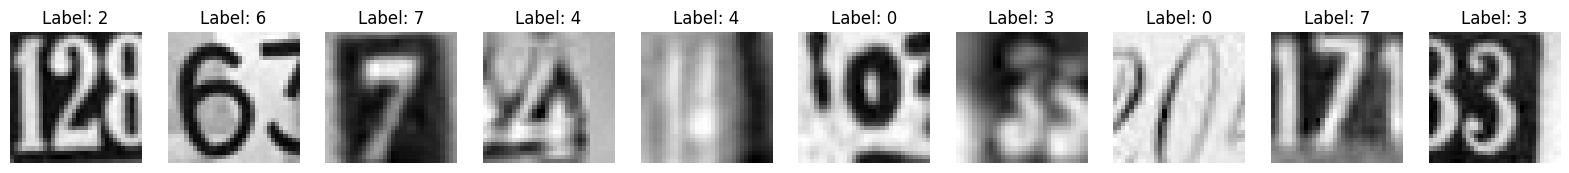

First 10 labels:  [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualize the first 10 images and print the first 10 labels
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {y_train[i]}')

plt.show()

# Print the first 10 labels
print("First 10 labels: ", y_train[:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and array of pixels for the first image in the training dataset
print(f'Shape of the first image: {X_train[0].shape}')
print('Array of pixels for the first image:')
print(X_train[0])

Shape of the first image: (32, 32)
Array of pixels for the first image:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [38]:
# Normalize the train and test datasets by dividing by 255
X_train_normalized = X_train.astype('float32') / 255
X_val_normalized = X_val.astype('float32') / 255
X_test_normalized = X_test.astype('float32') / 255

Print the shapes of Training and Test data

In [39]:
# Print the new shapes of the train and test datasets
print(f'New shape of X_train: {X_train_normalized.shape}')
print(f'New shape of X_val: {X_val_normalized.shape}')
print(f'New shape of X_test: {X_test_normalized.shape}')

New shape of X_train: (42000, 32, 32)
New shape of X_val: (60000, 32, 32)
New shape of X_test: (18000, 32, 32)


### **One-hot encode output**

In [40]:
# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# Print the shape of the encoded target variables
print(f'Shape of y_train_encoded: {y_train_encoded.shape}')
print(f'Shape of y_val_encoded: {y_val_encoded.shape}')
print(f'Shape of y_test_encoded: {y_test_encoded.shape}')

Shape of y_train_encoded: (42000, 10)
Shape of y_val_encoded: (60000, 10)
Shape of y_test_encoded: (18000, 10)


**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [41]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [43]:
# Define the ANN model function
def nn_model_1(input_shape=(1024,), num_classes=10):
    model = Sequential()

    # First hidden layer
    model.add(Dense(64, activation='relu', input_shape=input_shape))

    # Second hidden layer
    model.add(Dense(32, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Call the function and store the output in a new variable
ann_model_1 = nn_model_1()

# Print the summary of the model
ann_model_1.summary()

# Assuming X_train_ann and y_train_ann are your flattened and one-hot encoded training data
# Flatten and one-hot encode the target variable if needed
# Reshape the data
X_train_flattened = X_train_normalized.reshape((X_train_normalized.shape[0], -1))
X_val_flattened = X_val_normalized.reshape((X_val_normalized.shape[0], -1))
X_test_flattened = X_test_normalized.reshape((X_test_normalized.shape[0], -1))

# Fit the model on the training data
history_ann_1 = ann_model_1.fit(X_train_flattened, y_train_encoded,
                            validation_split=0.2,
                            batch_size=128,
                            epochs=20,
                            verbose=1)

# Print the model summary
ann_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 2s 4ms/step - loss: 2.3001 - accuracy: 0.1028 - val_loss: 2.2833 - val_accuracy: 0.1186
Epoch 2/20
263/263 [==============================] - 1s 3ms/step - loss: 2.1704 - accuracy: 0.1865 - val_loss: 1.9455 - val_accuracy: 0.3

### **Plot the Training and Validation Accuracies and write down your Observations.**

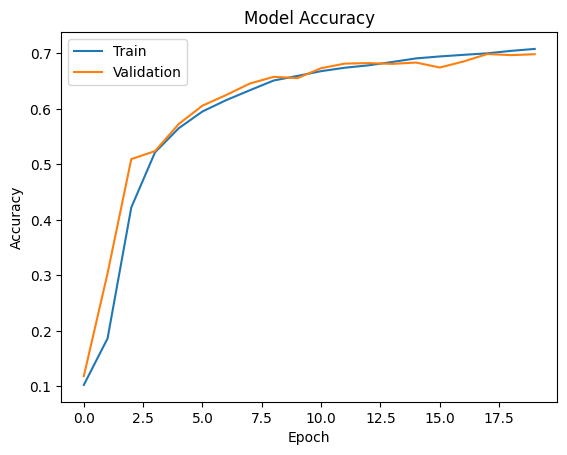

In [44]:
plt.plot(history_ann_1.history['accuracy'])

plt.plot(history_ann_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**

- The training accuracy continues to improve steadily and reaches a **high value around 0.7**. The validation accuracy also improves and stays close to the training accuracy throughout the epochs, indicating **good generalization**.

- The lines for training and validation accuracy are close to each other and stabilize around the same value towards the end of the training period, suggesting that the model is **not overfitting** and is **generalizing well** to the validation data.

- Room for Improvement - While the model shows steady improvement, the final accuracy around 70% indicates that there might still be room for improvement. Techniques such as adding more layers, experimenting with different activation functions, or tuning hyperparameters could help improve performance further.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [45]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [46]:
def nn_model_2(input_shape=(1024,), num_classes=10):
    model = Sequential()

    # First hidden layer
    model.add(Dense(256, activation='relu', input_shape=input_shape))

    # Second hidden layer
    model.add(Dense(128, activation='relu'))

    # Dropout layer with rate 0.2
    model.add(Dropout(0.2))

    # Third hidden layer
    model.add(Dense(64, activation='relu'))

    # Fourth hidden layer
    model.add(Dense(64, activation='relu'))

    # Fifth hidden layer
    model.add(Dense(32, activation='relu'))

    # BatchNormalization layer
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Call the function and store the output in a new variable
ann_model_2 = nn_model_2()

# Print the summary of the model
ann_model_2.summary()

# Fit the model on the training data
history_ann_2 = ann_model_2.fit(X_train_flattened, y_train_encoded,
                                validation_split=0.2,
                                batch_size=128,
                                epochs=30,
                                verbose=1)

# Print the model summary
ann_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

### **Plot the Training and Validation Accuracies and write down your Observations.**

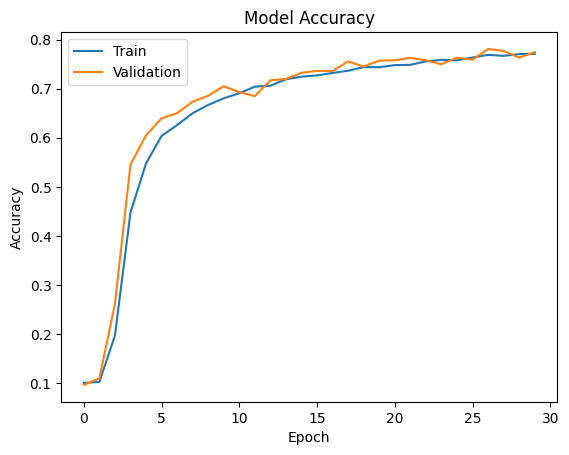

In [47]:
plt.plot(history_ann_2.history['accuracy'])

plt.plot(history_ann_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**

- The model shows **good performance** with both training and validation accuracy improving significantly and converging around **77%**.
- **No Overfitting** - The closeness of the training and validation accuracy curves suggests that the model is not overfitting and is **generalizing well** to the validation data.
- Steady Improvement - The accuracy continues to improve steadily across the epochs, indicating that the model is learning effectively.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [48]:
# Make predictions on the test set
y_test_pred = ann_model_2.predict(X_test_flattened)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predictions from one-hot encoded to class labels
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1814
           1       0.76      0.83      0.79      1828
           2       0.76      0.82      0.79      1803
           3       0.77      0.72      0.74      1719
           4       0.82      0.83      0.82      1812
           5       0.74      0.76      0.75      1768
           6       0.75      0.81      0.78      1832
           7       0.86      0.78      0.82      1808
           8       0.75      0.71      0.73      1812
           9       0.72      0.76      0.74      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



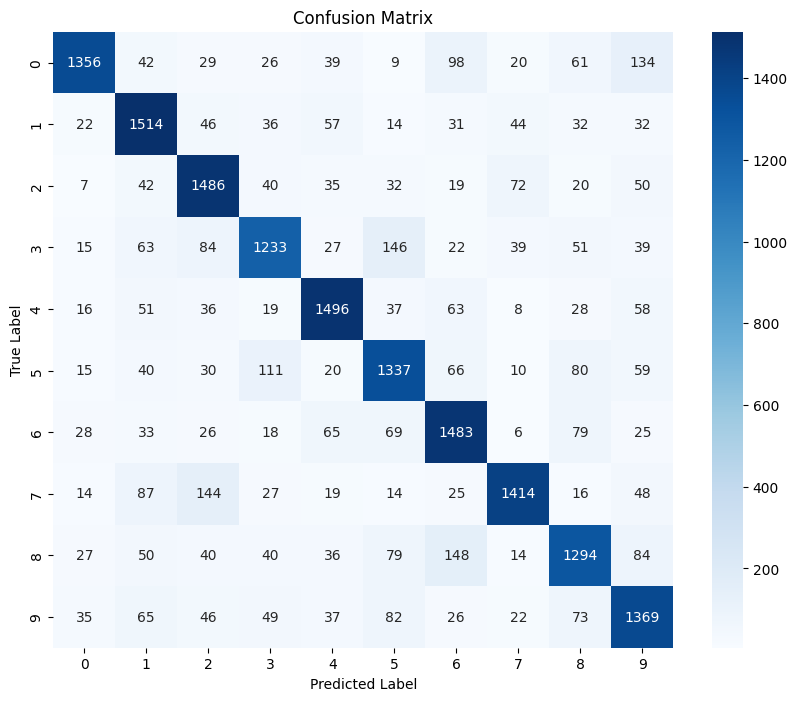

In [50]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Final Observations:**

- The model shows good precision, recall, and F1-scores for all classes, indicating a **balanced performance overall**. The accuracy of **0.78** suggests that the model correctly classifies **78%** of the instances.
- Confusion Matrix Insights - Most predictions are **along the diagonal**, indicating **correct classifications**. Some confusion exists between certain classes, such as class 3 being confused with class 4 and class 8.
- Areas for Improvement- The slightly lower recall for some classes (e.g., class 3 and class 8) suggests room for improvement in correctly identifying these classes. Techniques like data augmentation, additional training data, or more complex architectures might help improve performance further.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [6]:
# Load the data from the .h5 file
file_path = '/content/drive/MyDrive/Colab/Elective_Project/SVHN_single_grey1.h5'
with h5py.File(file_path, 'r') as h5_file:
    X_train = np.array(h5_file['X_train'])
    y_train = np.array(h5_file['y_train'])
    X_val = np.array(h5_file['X_val'])
    y_val = np.array(h5_file['y_val'])
    X_test = np.array(h5_file['X_test'])
    y_test = np.array(h5_file['y_test'])

Check the number of images in the training and the testing dataset.

In [7]:
print(f'Number of training images: {X_train.shape[0]}')
print(f'Number of testing images: {X_test.shape[0]}')

Number of training images: 42000
Number of testing images: 18000


**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [8]:
# Print the shape and array of pixels for the first image in the training dataset
print(f'Shape of the first image: {X_train[0].shape}')
print('Array of pixels for the first image:')
print(X_train[0])

Shape of the first image: (32, 32)
Array of pixels for the first image:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [10]:
# Reshape the data to 4D (samples, height, width, channels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

Normalize inputs from 0-255 to 0-1

In [11]:
# Normalize the train and test datasets by dividing by 255
X_train_normalized = X_train.astype('float32') / 255
X_val_normalized = X_val.astype('float32') / 255
X_test_normalized = X_test.astype('float32') / 255

Print New shape of Training and Test

In [12]:
# Print the new shapes of the train and test datasets
print(f'New shape of X_train: {X_train_normalized.shape}')
print(f'New shape of X_val: {X_val_normalized.shape}')
print(f'New shape of X_test: {X_test_normalized.shape}')

New shape of X_train: (42000, 32, 32, 1)
New shape of X_val: (60000, 32, 32, 1)
New shape of X_test: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [13]:
# One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# Print the shape of the encoded target variables
print(f'Shape of y_train_encoded: {y_train_encoded.shape}')
print(f'Shape of y_val_encoded: {y_val_encoded.shape}')
print(f'Shape of y_test_encoded: {y_test_encoded.shape}')

Shape of y_train_encoded: (42000, 10)
Shape of y_val_encoded: (60000, 10)
Shape of y_test_encoded: (18000, 10)


**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [14]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [26]:
def cnn_model_1(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Final output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Call the function and store the output in a new variable
cnn_model_1 = cnn_model_1()

# Print the model summary
cnn_model_1.summary()

# Fit the model on the training data
history_1 = cnn_model_1.fit(X_train_normalized, y_train_encoded,
                        validation_split=0.2,
                        batch_size=32,
                        verbose=1,
                        epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

### **Plot the Training and Validation Accuracies and Write your observations.**

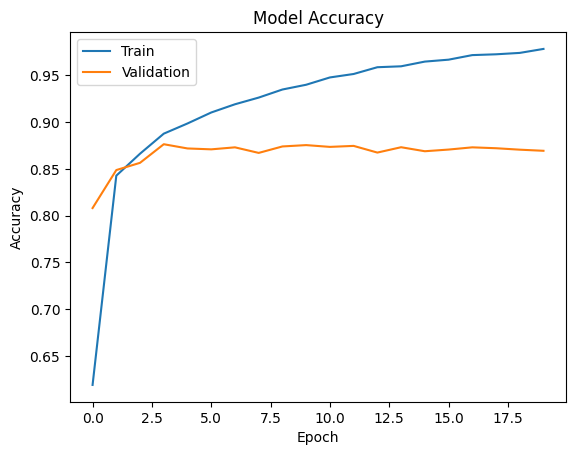

In [27]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**

- We can see from the above plot that the model has done poorly on the validation data. The model is highly overfitting the training data.
- The validation accuracy has become more or less constant after 2 epochs.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [28]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [29]:
# Define the CNN model function
def cnn_model_2(input_shape=(32, 32, 1), num_classes=10):
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max-pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 32 nodes
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Dropout layer with rate 0.5
    model.add(Dropout(0.5))

    # Final output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Call the function and store the output in a new variable
cnn_model_2 = cnn_model_2()

# Print the summary of the model
cnn_model_2.summary()

# Fit the model on the training data
history_2 = cnn_model_2.fit(X_train_normalized, y_train_encoded,
                        validation_split=0.2,
                        batch_size=128,
                        epochs=30,
                        verbose=1)

# Print the model summary
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

### **Plot the Training and Validation accuracies and write your observations.**

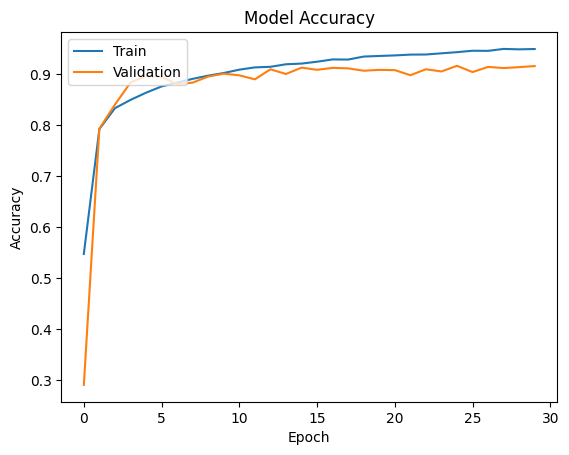

In [30]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**

- The second iteration of this model seems very promising now.
- **The validation accuracy has improved substantially** and the problem of **overfitting has been solved**. We can say that the **model is giving a generalized performance.**
- As training progresses, the training accuracy continues to improve steadily and reaches a **high value around 0.9**.
The validation accuracy also improves but starts to **stabilize around 0.85**.
- The gap between the training and validation accuracy suggests some level of overfitting. The model performs very well on the training data but slightly less so on the validation data. Overfitting is common in machine learning models and indicates that the model might be learning the training data too well, including noise and details that do not generalize to new, unseen data.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [31]:
# Make predictions on the test set
y_test_pred = cnn_model_2.predict(X_test_normalized)

563/563 [==============================] - 3s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.91      0.92      1828
           2       0.93      0.92      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.93      0.94      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.92      0.89      0.90      1832
           7       0.93      0.93      0.93      1808
           8       0.90      0.90      0.90      1812
           9       0.91      0.91      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.92      0.91      0.91     18000



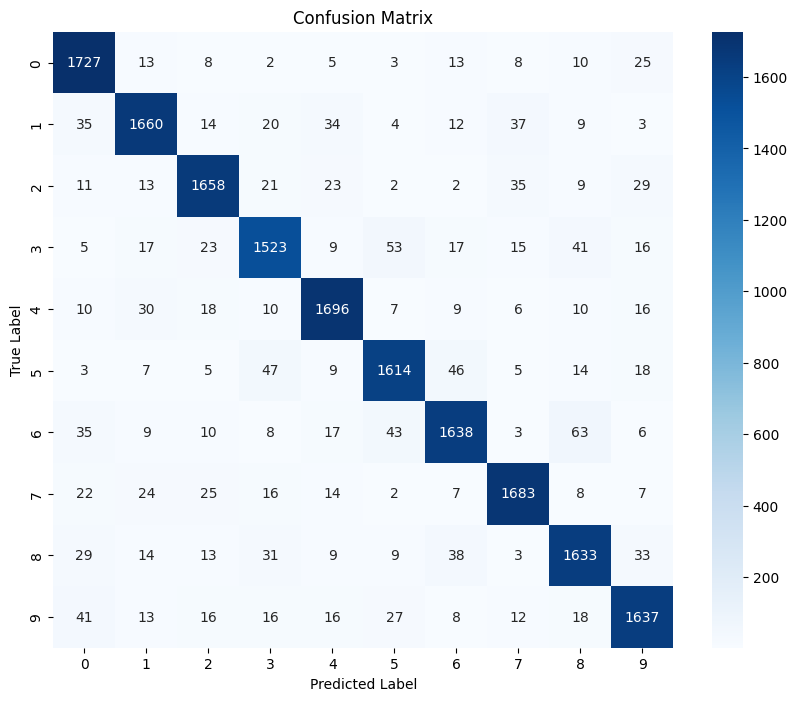

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predictions from one-hot encoded to class labels
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

- The model shows high precision, recall, and F1-scores for all classes, indicating **good performance overall**.
The accuracy of **0.91** suggests that the model correctly classifies **91%** of the instances.
- Confusion Matrix Insights - Most predictions are along the **diagonal**, indicating **correct classifications**. Some confusion exists between certain classes, such as class 1 being confused with class 0 and class 2.
- Areas for Improvement - The slight drop in recall for some classes (e.g., class 3 and class 6) suggests room for improvement in correctly identifying these classes. Techniques like data augmentation, additional training data, or more complex architectures might help improve performance further.

